<a href="https://colab.research.google.com/github/WahyuKhairi06/DeepLearning-WahyuKhairi-2311531009/blob/main/Praktikum%201/MLP_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import library**

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# **1. Load dataset**

In [65]:
iris = load_iris()
X, y = iris.data, iris.target
X = StandardScaler().fit_transform(X)


In [66]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Convert ke tensor
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)



# 2. Definisikan MLP

In [68]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),  # Hidden layer 1 (64 neuron)
            nn.ReLU(),
            nn.Linear(64, 32),          # Hidden layer 2 (32 neuron)
            nn.ReLU(),
            nn.Linear(32, output_dim)   # Output layer
        )

    def forward(self, x):
        return self.model(x)


# **3. Inisialisasi model**

In [69]:
model = MLP(4, 3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


# **4. Training loop**

In [70]:
losses = []
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())  # simpan nilai loss


    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.3100
Epoch [20/100], Loss: 0.0856
Epoch [30/100], Loss: 0.0515
Epoch [40/100], Loss: 0.0433
Epoch [50/100], Loss: 0.0401
Epoch [60/100], Loss: 0.0386
Epoch [70/100], Loss: 0.0368
Epoch [80/100], Loss: 0.0331
Epoch [90/100], Loss: 0.0293
Epoch [100/100], Loss: 0.0251


# **5. Evaluasi**

In [71]:
with torch.no_grad():
    y_pred = torch.argmax(model(X_test), dim=1)
    acc = accuracy_score(y_test, y_pred)
    print(f'\nAkurasi Model: {acc:.4f}')


Akurasi Model: 1.0000


# **6️. Visualisasi Loss**

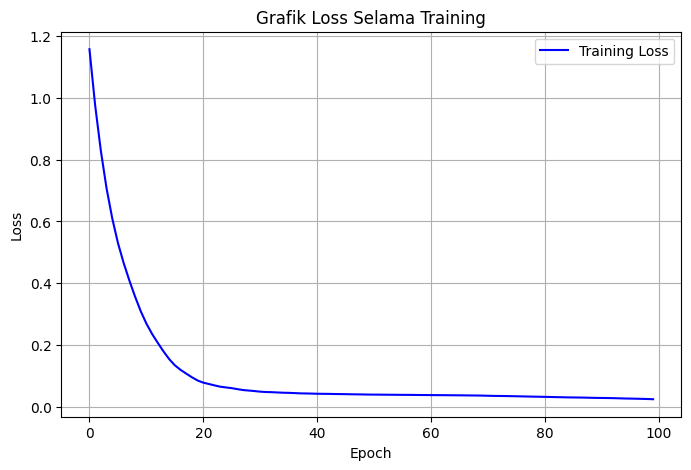

In [72]:
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Training Loss', color='blue')
plt.title('Grafik Loss Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# **7. Analisis Singkat**

In [73]:
print("\nAnalisis Hasil:")
print(f"- Model mencapai akurasi sekitar {acc:.2f}.")



Analisis Hasil:
- Model mencapai akurasi sekitar 1.00.
